In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])
                             ])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [3]:
dataiter=iter(trainloader)
images , labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


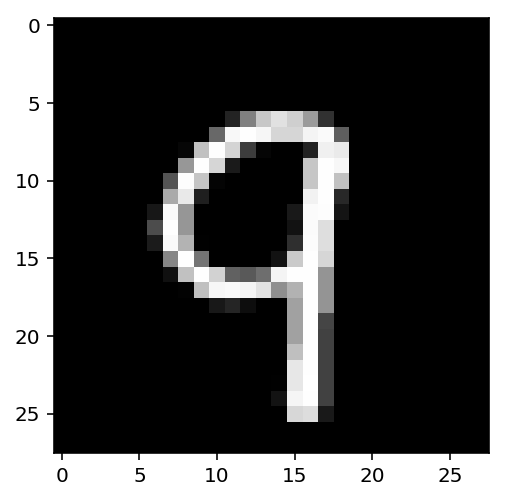

In [4]:
plt.imshow(images[54].numpy().squeeze(),cmap='Greys_r')


In [5]:
def activation(x):
    return (1/(1+torch.exp(-x)))

inputs=images.view(images.shape[0],-1)
W1=torch.randn(784,256)
b1=torch.randn(256)
W2=torch.randn(256,10)
b2=torch.randn(10)
h=activation(torch.mm(inputs,W1)+b1)
output=torch.mm(h,W2)+b2
print(output)

tensor([[ 2.3970e+00,  5.1462e+00, -5.3225e-02, -2.8916e+00,  5.7193e+00,
          1.4730e+01,  8.0227e+00,  1.8246e+00,  2.3789e+00, -1.0541e+01],
        [ 2.2233e+00,  6.5116e+00,  8.5412e+00,  1.1785e-01,  1.3481e+01,
          1.6982e+01,  1.1837e+01,  6.5026e+00,  3.9364e+00, -4.7494e+00],
        [-1.3291e+00,  1.6419e+00,  1.1225e+01, -7.4747e+00,  7.9389e+00,
          1.2801e+01,  9.9646e+00,  2.0969e+00,  4.5457e+00,  1.4088e+01],
        [ 2.9566e+00,  1.3587e+00,  1.2547e+01, -8.0597e+00,  4.4722e+00,
          1.3449e+01,  2.8852e+00,  8.4177e+00,  3.6025e+00,  1.4999e+00],
        [ 2.5265e+00,  1.2208e+01,  1.2945e+01, -7.4829e+00,  9.7001e-01,
          1.8309e+01,  6.1689e+00,  1.9507e+01,  4.5642e+00, -8.7414e+00],
        [ 5.6946e+00,  1.1544e+01,  4.4752e+00, -1.1122e+01, -1.0204e+00,
          9.7521e+00,  1.1352e+01,  1.2076e+00,  1.4893e+01,  6.9315e-01],
        [ 8.1308e+00,  2.4390e+00,  4.0847e+00, -3.8022e+00, -2.5494e+00,
          7.2629e+00,  7.1314e+0

          1.2406e+01,  2.2769e+00,  7.2237e+00,  3.6835e+00, -1.1687e+01]])


In [6]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities=softmax(output)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [7]:
from torch import nn

In [8]:
class Networks(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden=nn.Linear(784,256)
        self.out=nn.Linear(256,10)
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
    def forward(self,x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.out(x)
        x=self.softmax(x)
        return x

In [14]:
model=Networks()
model

Networks(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [15]:
class Network_relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1(784,128)
        self.hidden2(128,64)
        self.out(64,10)
        self.relu=nn.ReLU()
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        x=self.hidden1(x)
        x=self.relu(x)
        x=self.hidden2(x)
        x=self.relu(x)
        x=self.out(x)
        x=self.softmax(x)
        return x
    

Now I will be using all the above tools which I have learnt and will be applying them in the neural network.

In [16]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets , transforms
from torch import optim

In [17]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax())
criterion = nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.003)
logits=model(inputs)
loss=criterion(logits,labels)
print(loss)


tensor(2.3089, grad_fn=<NllLossBackward>)


In [18]:
epochs=5
for i in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        images=images.view(images.shape[0],-1)
        optimizer.zero_grad() #cleaning_optimizer
        output=model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.955075466937856
Training loss: 0.9075916322436668
Training loss: 0.5360518402255166
Training loss: 0.4311122102206196
Training loss: 0.3838224908563374


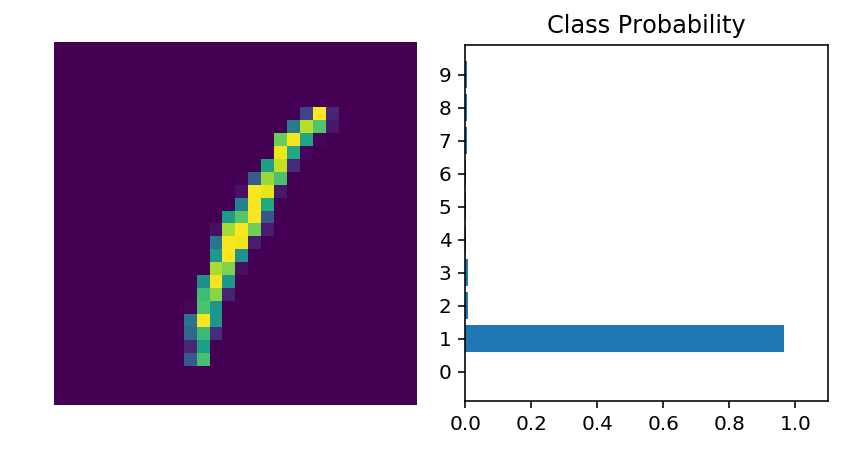

In [24]:
import helper
image,labels=next(iter(trainloader))
img=image[0].view(1,784)
with torch.no_grad():
    logits=model.forward(img)
ps=F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28),ps)